In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow.keras.backend as K
from tensorflow.keras import layers

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [3]:
data = pd.read_csv('datatest2.txt')
data.head(5)

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-11 14:48:00,21.7600,31.133333,437.333333,1029.666667,0.005021,1
2,2015-02-11 14:49:00,21.7900,31.000000,437.333333,1000.000000,0.005009,1
3,2015-02-11 14:50:00,21.7675,31.122500,434.000000,1003.750000,0.005022,1
4,2015-02-11 14:51:00,21.7675,31.122500,439.000000,1009.500000,0.005022,1
5,2015-02-11 14:51:59,21.7900,31.133333,437.333333,1005.666667,0.005030,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9752 entries, 1 to 9752
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           9752 non-null   object 
 1   Temperature    9752 non-null   float64
 2   Humidity       9752 non-null   float64
 3   Light          9752 non-null   float64
 4   CO2            9752 non-null   float64
 5   HumidityRatio  9752 non-null   float64
 6   Occupancy      9752 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 609.5+ KB


In [5]:
def toOrdinalDate(column):
    arr=[]
    for date in column:
        time=pd.Timestamp(date)
        time=time.toordinal()
        arr.append(time)
    return pd.DataFrame(np.array(arr), index=data.index)
data['date'] = toOrdinalDate(data['date'].to_numpy())

In [6]:
def rescaling(dfColumn):
    feature = dfColumn.to_numpy().reshape(-1, 1)
    minmax_scale = StandardScaler()
    scaled_feature = minmax_scale.fit_transform(feature)
    return pd.Series(scaled_feature.reshape(-1), index=data.index)

for column in data:
    if column != 'Occupancy':
        data[column] = rescaling(data[column])


In [7]:
data.head(5)
data['Occupancy'] = data['Occupancy'].astype('float64')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9752 entries, 1 to 9752
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           9752 non-null   float64
 1   Temperature    9752 non-null   float64
 2   Humidity       9752 non-null   float64
 3   Light          9752 non-null   float64
 4   CO2            9752 non-null   float64
 5   HumidityRatio  9752 non-null   float64
 6   Occupancy      9752 non-null   float64
dtypes: float64(7)
memory usage: 609.5 KB


## Razdvajanje klasne kolone od nezavisnih atributa

In [8]:
from sklearn.model_selection import train_test_split
X = data.iloc[:,0:6]
Y = data.iloc[:,-1]
#print(X)
#print(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

## Funkcija za proveru i prikaz rezultata
Podaci koje je moguce izvuci iz history callback-a su:<br>
['accuracy', 'loss', 'val_accuracy', 'val_loss']

In [9]:
def print_result(model):
    model.evaluate(X_test, Y_test)[1]
    #-----------------------------------------------
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.show()
    #------------------------------------------------
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='lower right')
    plt.show()

In [10]:
BATCH_SIZE=64
EPOCHS=30
INPUT_DIM=6
NODES1=16
NODES2=16

In [11]:
_EPSILON = K.epsilon()
def custom_loss(y_true, y_pred):
    #squared_difference = tf.square(y_true - y_pred)
    #return -tf.sum([y_true[i]*log2(y_pred[i]) for i in range(len(y_true))])
    #return tf.reduce_mean(squared_difference, axis=-1)
    y_pred = K.clip(y_pred, _EPSILON, 1.0-_EPSILON)
    out = -(y_true * K.log(y_pred) + (1.0 - y_true) * K.log(1.0 - y_pred))
    return K.mean(out, axis=-1)

# Definisanje i treniranje modela

## Loss: binary_crossentropy

Epoch 1/30
122/122 [==============================] - 1s 3ms/step - loss: 0.7064 - accuracy: 0.5059 - val_loss: 0.4619 - val_accuracy: 0.8601
Epoch 2/30
122/122 [==============================] - 0s 1ms/step - loss: 0.4156 - accuracy: 0.8692 - val_loss: 0.3067 - val_accuracy: 0.9293
Epoch 3/30
122/122 [==============================] - 0s 1ms/step - loss: 0.2713 - accuracy: 0.9450 - val_loss: 0.2077 - val_accuracy: 0.9826
Epoch 4/30
122/122 [==============================] - 0s 1ms/step - loss: 0.1819 - accuracy: 0.9857 - val_loss: 0.1478 - val_accuracy: 0.9795
Epoch 5/30
122/122 [==============================] - 0s 1ms/step - loss: 0.1274 - accuracy: 0.9844 - val_loss: 0.1149 - val_accuracy: 0.9774
Epoch 6/30
122/122 [==============================] - 0s 1ms/step - loss: 0.0925 - accuracy: 0.9864 - val_loss: 0.0953 - val_accuracy: 0.9790
Epoch 7/30
122/122 [==============================] - 0s 1ms/step - loss: 0.0757 - accuracy: 0.9867 - val_loss: 0.0830 - val_accuracy: 0.9795
Epoch 

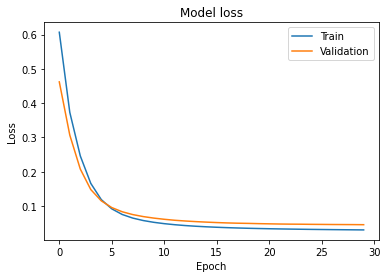

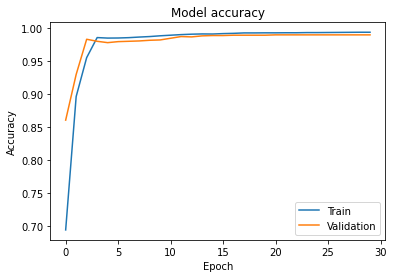

In [20]:
network = Sequential()
network.add(Dense(NODES1, activation="relu", input_dim=INPUT_DIM))
network.add(Dense(NODES2,activation="relu"))
network.add(Dense(1, activation="sigmoid"))

network.compile(optimizer='sgd', 
                loss='binary_crossentropy', 
                metrics=['accuracy'])

hist = network.fit(X_train, Y_train, 
                   batch_size=BATCH_SIZE, epochs=EPOCHS, 
                   validation_data=(X_test, Y_test))

network.summary()

print_result(network)

## Loss: custom_loss

Epoch 1/30
122/122 [==============================] - 1s 4ms/step - loss: 0.6450 - accuracy: 0.6555 - val_loss: 0.4408 - val_accuracy: 0.8713
Epoch 2/30
122/122 [==============================] - 0s 1ms/step - loss: 0.4054 - accuracy: 0.8727 - val_loss: 0.3044 - val_accuracy: 0.8826
Epoch 3/30
122/122 [==============================] - 0s 1ms/step - loss: 0.2739 - accuracy: 0.8948 - val_loss: 0.2058 - val_accuracy: 0.9411
Epoch 4/30
122/122 [==============================] - 0s 1ms/step - loss: 0.1842 - accuracy: 0.9576 - val_loss: 0.1506 - val_accuracy: 0.9641
Epoch 5/30
122/122 [==============================] - 0s 2ms/step - loss: 0.1340 - accuracy: 0.9731 - val_loss: 0.1188 - val_accuracy: 0.9733
Epoch 6/30
122/122 [==============================] - 0s 1ms/step - loss: 0.1092 - accuracy: 0.9791 - val_loss: 0.0989 - val_accuracy: 0.9749
Epoch 7/30
122/122 [==============================] - 0s 1ms/step - loss: 0.0870 - accuracy: 0.9824 - val_loss: 0.0857 - val_accuracy: 0.9759
Epoch 

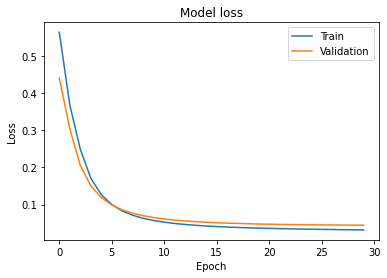

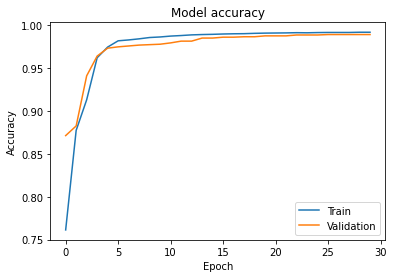

In [12]:
network = Sequential()
network.add(Dense(NODES1, activation="relu", input_dim=INPUT_DIM))
network.add(Dense(NODES2,activation="relu"))
network.add(Dense(1, activation="sigmoid"))

network.compile(optimizer='sgd', 
                loss=custom_loss, 
                metrics=['accuracy'])

hist = network.fit(X_train, Y_train, 
                   batch_size=BATCH_SIZE, epochs=EPOCHS, 
                   validation_data=(X_test, Y_test))

network.summary()

print_result(network)

## Loss: squared_hinge

Epoch 1/30
98/98 [==============================] - 1s 3ms/step - loss: 0.7372 - accuracy: 0.7818 - val_loss: 0.1964 - val_accuracy: 0.8527
Epoch 2/30
98/98 [==============================] - 0s 1ms/step - loss: 0.1531 - accuracy: 0.9008 - val_loss: 0.1071 - val_accuracy: 0.9257
Epoch 3/30
98/98 [==============================] - 0s 2ms/step - loss: 0.0877 - accuracy: 0.9410 - val_loss: 0.0741 - val_accuracy: 0.9443
Epoch 4/30
98/98 [==============================] - 0s 2ms/step - loss: 0.0690 - accuracy: 0.9602 - val_loss: 0.0574 - val_accuracy: 0.9840
Epoch 5/30
98/98 [==============================] - 0s 1ms/step - loss: 0.0525 - accuracy: 0.9903 - val_loss: 0.0478 - val_accuracy: 0.9936
Epoch 6/30
98/98 [==============================] - 0s 1ms/step - loss: 0.0442 - accuracy: 0.9944 - val_loss: 0.0414 - val_accuracy: 0.9936
Epoch 7/30
98/98 [==============================] - 0s 1ms/step - loss: 0.0421 - accuracy: 0.9941 - val_loss: 0.0369 - val_accuracy: 0.9949
Epoch 8/30
98/98 [==

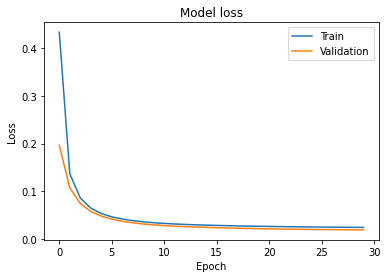

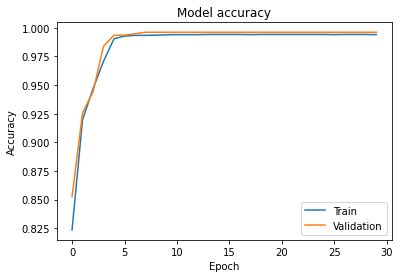

In [13]:
# promena vrednosti klasa {0,1} na {-1,1}
yHinge = Y
yHinge.replace({0: -1})

X_trainH, X_testH, Y_trainH, Y_testH = train_test_split(X, yHinge, test_size=0.2, random_state=1)

X_trainH, X_valH, Y_trainH, Y_valH = train_test_split(X_trainH, Y_trainH, test_size=0.2, random_state=1)

# radi dobro kada je u poslednjem sloju tanh aktivaciona funkcija
classifier2 = Sequential([Dense(NODES1, activation='relu', input_dim=INPUT_DIM),
                          Dense(NODES2, activation='relu'), 
                          Dense(1, activation='tanh'),])

classifier2.compile(optimizer='sgd',  
                    loss='squared_hinge', 
                    metrics=['accuracy'])

hist = classifier2.fit(X_trainH, Y_trainH, 
                       batch_size=BATCH_SIZE, epochs=EPOCHS,
                       validation_data=(X_valH, Y_valH))

print_result(classifier2)

## Loss: categorical_hinge

Epoch 1/30
122/122 [==============================] - 1s 2ms/step - loss: 0.6984 - accuracy: 0.7969 - val_loss: 0.3453 - val_accuracy: 0.8739
Epoch 2/30
122/122 [==============================] - 0s 1ms/step - loss: 0.3011 - accuracy: 0.8863 - val_loss: 0.1855 - val_accuracy: 0.9344
Epoch 3/30
122/122 [==============================] - 0s 1ms/step - loss: 0.1569 - accuracy: 0.9484 - val_loss: 0.1105 - val_accuracy: 0.9780
Epoch 4/30
122/122 [==============================] - 0s 1ms/step - loss: 0.0946 - accuracy: 0.9823 - val_loss: 0.0770 - val_accuracy: 0.9856
Epoch 5/30
122/122 [==============================] - 0s 1ms/step - loss: 0.0572 - accuracy: 0.9922 - val_loss: 0.0605 - val_accuracy: 0.9892
Epoch 6/30
122/122 [==============================] - 0s 1ms/step - loss: 0.0467 - accuracy: 0.9932 - val_loss: 0.0506 - val_accuracy: 0.9892
Epoch 7/30
122/122 [==============================] - 0s 1ms/step - loss: 0.0379 - accuracy: 0.9938 - val_loss: 0.0439 - val_accuracy: 0.9892
Epoch 

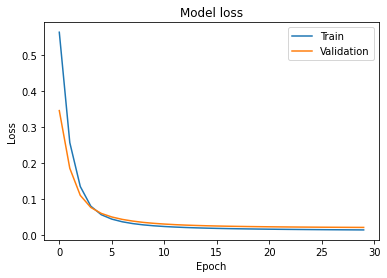

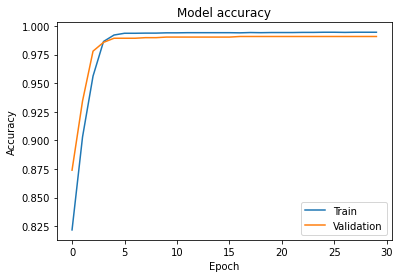

In [14]:
# radi dobro kada je u poslednjem sloju tanh aktivaciona funkcija
classifier3 = Sequential([Dense(NODES1, activation='relu', input_dim=INPUT_DIM),
                          Dense(NODES2, activation='relu'), 
                          Dense(1, activation='tanh'),])

classifier3.compile(optimizer='sgd',  
                    loss='categorical_hinge', 
                    metrics=['accuracy'])

hist = classifier3.fit(X_train, Y_train, 
                       batch_size=BATCH_SIZE, epochs=EPOCHS,
                       validation_data=(X_test, Y_test))

print_result(classifier3)

## Loss: Modifikacija MSE loss funckije

Epoch 1/30
122/122 [==============================] - 1s 2ms/step - loss: 0.1732 - accuracy: 0.4469 - val_loss: 0.1271 - val_accuracy: 0.8288
Epoch 2/30
122/122 [==============================] - 0s 1ms/step - loss: 0.1204 - accuracy: 0.8176 - val_loss: 0.0985 - val_accuracy: 0.7940
Epoch 3/30
122/122 [==============================] - 0s 1ms/step - loss: 0.0962 - accuracy: 0.7870 - val_loss: 0.0831 - val_accuracy: 0.7955
Epoch 4/30
122/122 [==============================] - 0s 1ms/step - loss: 0.0822 - accuracy: 0.8033 - val_loss: 0.0724 - val_accuracy: 0.8616
Epoch 5/30
122/122 [==============================] - 0s 1ms/step - loss: 0.0714 - accuracy: 0.8881 - val_loss: 0.0639 - val_accuracy: 0.9149
Epoch 6/30
122/122 [==============================] - 0s 1ms/step - loss: 0.0616 - accuracy: 0.9258 - val_loss: 0.0569 - val_accuracy: 0.9293
Epoch 7/30
122/122 [==============================] - 0s 1ms/step - loss: 0.0575 - accuracy: 0.9213 - val_loss: 0.0509 - val_accuracy: 0.9349
Epoch 

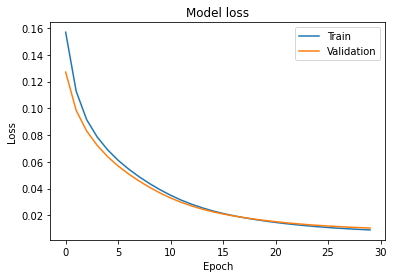

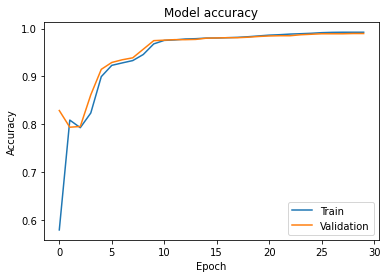

In [15]:
classifier4 = Sequential([Dense(NODES1, activation='relu', input_dim=INPUT_DIM),
                          Dense(NODES2, activation='relu'), 
                          Dense(1, activation='sigmoid'),])

# modifikovana MSE loss funcija, i ako MSE odgovara regresiji, a ne klasifikaciji
# u sustini jedina razlika jeste ta da se razlika izmedju stvarne vrednisti i predvidjene
# deli sa 10. Na taj nacin se dobija da se smanjuje magnituda gubitaka sto moze biti korisno
# u situacijama kada je MSE velika
# shape y_pred jeste [32,1] jer je prva dimenzija uvek jednaka velicini batch_size a druga 
# broju izlaznih cvorova. Funkcija uvek treba da vrati vektor duzine batch_size

def custom_mse_loss(y_actual, y_pred):
    y_actual = tf.dtypes.cast(y_actual, tf.float32)
    loss = K.mean(K.sum(K.square((y_actual-y_pred)/10.)))
    return loss

classifier4.compile(optimizer='sgd',  
                    loss=custom_mse_loss, 
                    metrics=['accuracy'])

hist = classifier4.fit(X_train, Y_train, 
                       batch_size=BATCH_SIZE, epochs=EPOCHS,
                       validation_data=(X_test, Y_test))

print_result(classifier4)

##  Loss: Sign penalty

Epoch 1/30
122/122 [==============================] - 1s 2ms/step - loss: 0.2656 - accuracy: 0.4321 - val_loss: 0.1834 - val_accuracy: 0.8713
Epoch 2/30
122/122 [==============================] - 0s 1ms/step - loss: 0.1656 - accuracy: 0.8849 - val_loss: 0.1265 - val_accuracy: 0.9277
Epoch 3/30
122/122 [==============================] - 0s 1ms/step - loss: 0.1159 - accuracy: 0.9450 - val_loss: 0.0901 - val_accuracy: 0.9708
Epoch 4/30
122/122 [==============================] - 0s 1ms/step - loss: 0.0827 - accuracy: 0.9755 - val_loss: 0.0671 - val_accuracy: 0.9759
Epoch 5/30
122/122 [==============================] - 0s 2ms/step - loss: 0.0608 - accuracy: 0.9807 - val_loss: 0.0525 - val_accuracy: 0.9759
Epoch 6/30
122/122 [==============================] - 0s 1ms/step - loss: 0.0465 - accuracy: 0.9792 - val_loss: 0.0429 - val_accuracy: 0.9769
Epoch 7/30
122/122 [==============================] - 0s 1ms/step - loss: 0.0378 - accuracy: 0.9822 - val_loss: 0.0364 - val_accuracy: 0.9769
Epoch 

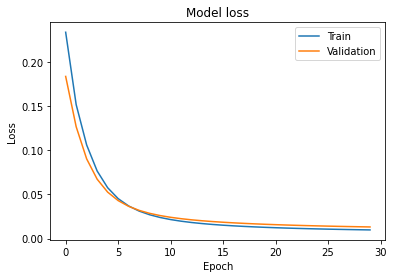

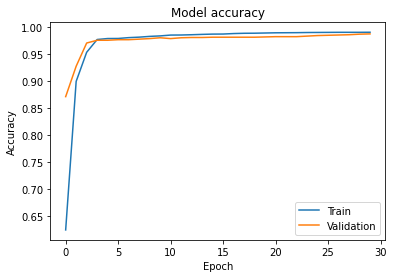

In [16]:
# najpre se proverava da li znak predikcije i stvarne vrednosti razlicit
# ako jeste to je promasaj znaka i taj slucaj se kaznjava tako sto se mnozi sa 10
# ako su predikcija i stvarna vrednost istog znaka, nema kaznjavanja
# vraca srednju vrednost gresaka

def sign_penalty(y_actual, y_pred):
    y_actual = tf.dtypes.cast(y_actual, tf.float32)
    penalty = 10.
    loss = tf.where(tf.less(y_actual * y_pred, 0), \
                     penalty * tf.square(y_actual - y_pred), \
                     tf.square(y_actual - y_pred))
    return tf.reduce_mean(loss, axis=-1)

classifier5 = Sequential([Dense(NODES1, activation='relu', input_dim=INPUT_DIM),
                          Dense(NODES2, activation='relu'), 
                          Dense(1, activation='sigmoid'),])

classifier5.compile(optimizer='sgd',  
                    loss=sign_penalty, 
                    metrics=['accuracy'])

hist = classifier5.fit(X_train, Y_train, 
                       batch_size=BATCH_SIZE, epochs=EPOCHS,
                       validation_data=(X_test, Y_test))

print_result(classifier5)

## Loss: custom_loss

Epoch 1/30
122/122 [==============================] - 1s 2ms/step - loss: 50.7239 - accuracy: 0.3046 - val_loss: 50.1117 - val_accuracy: 0.2752
Epoch 2/30
122/122 [==============================] - 0s 1ms/step - loss: 50.6144 - accuracy: 0.2915 - val_loss: 50.1117 - val_accuracy: 0.2752
Epoch 3/30
122/122 [==============================] - 0s 1ms/step - loss: 50.4186 - accuracy: 0.2877 - val_loss: 50.1117 - val_accuracy: 0.2752
Epoch 4/30
122/122 [==============================] - 0s 1ms/step - loss: 50.4723 - accuracy: 0.2811 - val_loss: 50.1117 - val_accuracy: 0.2747
Epoch 5/30
122/122 [==============================] - 0s 1ms/step - loss: 49.9036 - accuracy: 0.2875 - val_loss: 50.1117 - val_accuracy: 0.2747
Epoch 6/30
122/122 [==============================] - 0s 2ms/step - loss: 50.5921 - accuracy: 0.2891 - val_loss: 50.1117 - val_accuracy: 0.2747
Epoch 7/30
122/122 [==============================] - 0s 1ms/step - loss: 50.7700 - accuracy: 0.2848 - val_loss: 50.1117 - val_accuracy:

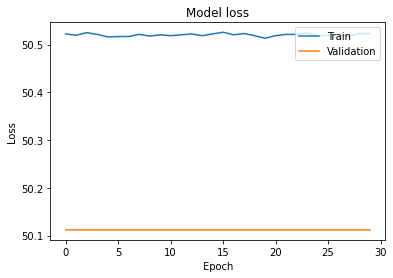

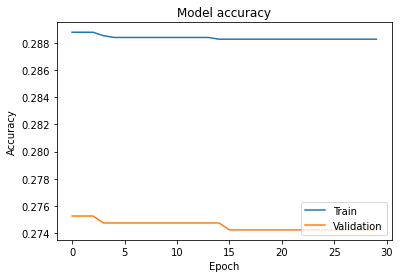

In [17]:
classifier6 = Sequential([Dense(NODES1, activation='relu', input_dim=INPUT_DIM),
                          Dense(NODES2, activation='relu'), 
                          Dense(1, activation='sigmoid'),])

# keepsdims ako se ne stavi true smanjuje dim za 1
def custom_loss(y_actual, y_pred):
    y_actual = tf.dtypes.cast(y_actual, tf.float32)
    nb_devide = K.sqrt(K.sum(K.square(y_pred),axis = 1, keepdims=True))
    predicted = y_pred / nb_devide
    return K.sum(K.square(y_actual - predicted))

classifier6.compile(optimizer='sgd',  
                    loss=custom_loss, 
                    metrics=['accuracy'])

hist = classifier6.fit(X_train, Y_train, 
                       batch_size=BATCH_SIZE, epochs=EPOCHS,
                       validation_data=(X_test, Y_test))

print_result(classifier6)

## Koriscenje adam(Adaptive Moment estimation) optimizatora
Adam algorotam je brzi i zauzima manje memorije od SGD koji je i dalje najkorisceniji. Kreiran je sa idejom da koristi prednosti RMSProp(Root Mean Square Propagation) i AdaGrad(Adaptive Gradient) algoritama.
<br>Dropout sloj se koristi za sprecavanje overfitting-a tako sto zanemaruje pojedine cvorove tokom treniranja.
<br>
### Optimizer: adam & Loss: binary_crossentropy & without Dropout layer

Epoch 1/30
122/122 [==============================] - 1s 2ms/step - loss: 0.5521 - accuracy: 0.7372 - val_loss: 0.2089 - val_accuracy: 0.9739
Epoch 2/30
122/122 [==============================] - 0s 1ms/step - loss: 0.1457 - accuracy: 0.9820 - val_loss: 0.0717 - val_accuracy: 0.9851
Epoch 3/30
122/122 [==============================] - 0s 2ms/step - loss: 0.0471 - accuracy: 0.9898 - val_loss: 0.0497 - val_accuracy: 0.9897
Epoch 4/30
122/122 [==============================] - 0s 1ms/step - loss: 0.0294 - accuracy: 0.9932 - val_loss: 0.0456 - val_accuracy: 0.9897
Epoch 5/30
122/122 [==============================] - 0s 1ms/step - loss: 0.0292 - accuracy: 0.9928 - val_loss: 0.0454 - val_accuracy: 0.9897
Epoch 6/30
122/122 [==============================] - 0s 1ms/step - loss: 0.0285 - accuracy: 0.9930 - val_loss: 0.0443 - val_accuracy: 0.9897
Epoch 7/30
122/122 [==============================] - 0s 1ms/step - loss: 0.0272 - accuracy: 0.9939 - val_loss: 0.0450 - val_accuracy: 0.9897
Epoch 

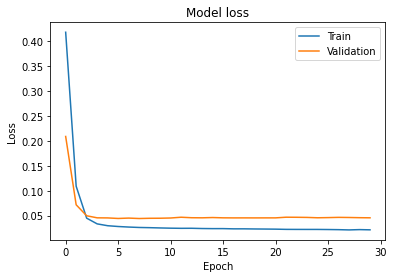

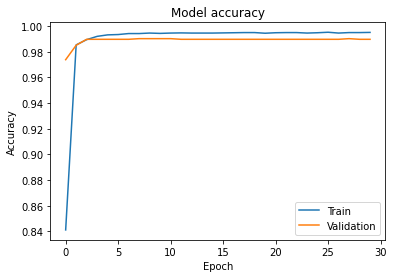

In [18]:
classifier7 = Sequential()
classifier7.add(Dense(NODES1, activation='relu', input_dim=INPUT_DIM))
classifier7.add(Dense(NODES2, activation='relu'))
classifier7.add(Dense(1, activation='sigmoid'))

classifier7.compile(optimizer='adam',  
                    loss='binary_crossentropy', 
                    metrics=['accuracy'])

hist = classifier7.fit(X_train, Y_train, 
                       batch_size=BATCH_SIZE, epochs=EPOCHS,
                       validation_data=(X_test, Y_test))

print_result(classifier7)

### Optimizer: adam & Loss: binary_crossentropy & Dropout layer

Epoch 1/30
122/122 [==============================] - 1s 2ms/step - loss: 0.5995 - accuracy: 0.6560 - val_loss: 0.2702 - val_accuracy: 0.9416
Epoch 2/30
122/122 [==============================] - 0s 2ms/step - loss: 0.2611 - accuracy: 0.9150 - val_loss: 0.0987 - val_accuracy: 0.9790
Epoch 3/30
122/122 [==============================] - 0s 2ms/step - loss: 0.1254 - accuracy: 0.9647 - val_loss: 0.0582 - val_accuracy: 0.9841
Epoch 4/30
122/122 [==============================] - 0s 2ms/step - loss: 0.0889 - accuracy: 0.9709 - val_loss: 0.0485 - val_accuracy: 0.9887
Epoch 5/30
122/122 [==============================] - 0s 1ms/step - loss: 0.0645 - accuracy: 0.9802 - val_loss: 0.0454 - val_accuracy: 0.9897
Epoch 6/30
122/122 [==============================] - 0s 2ms/step - loss: 0.0581 - accuracy: 0.9809 - val_loss: 0.0453 - val_accuracy: 0.9897
Epoch 7/30
122/122 [==============================] - 0s 2ms/step - loss: 0.0584 - accuracy: 0.9813 - val_loss: 0.0460 - val_accuracy: 0.9897
Epoch 

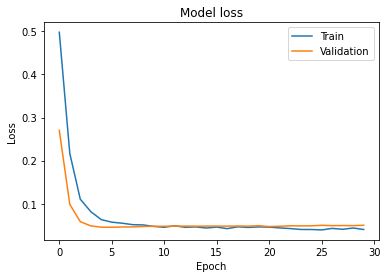

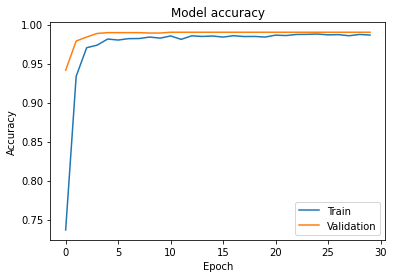

In [19]:
classifier7 = Sequential()
classifier7.add(Dense(NODES1, activation='relu', input_dim=INPUT_DIM))
classifier7.add(Dense(NODES2, activation='relu'))
classifier7.add(layers.Dropout(0.6))
classifier7.add(Dense(1, activation='sigmoid'))

classifier7.compile(optimizer='adam',  
                    loss='binary_crossentropy', 
                    metrics=['accuracy'])

hist = classifier7.fit(X_train, Y_train, 
                       batch_size=BATCH_SIZE, epochs=EPOCHS,
                       validation_data=(X_test, Y_test))

print_result(classifier7)